In [1]:
pip install fastai

In [2]:
import timm
from fastai.vision.all import *

In [1]:
! mkdir -p data && tar xzf "/content/drive/MyDrive/Colab Notebooks/ml_pics.tar.gz" -C data

In [4]:
! ls data && find ./data/ -type d | xargs ls -l | wc -l

Maddy  Rebel  Spice
649


In [ ]:
fnames = get_image_files('data')
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func('data', fnames, label_func, item_tfms=Resize(512), batch_tfms=aug_transforms(size=224))

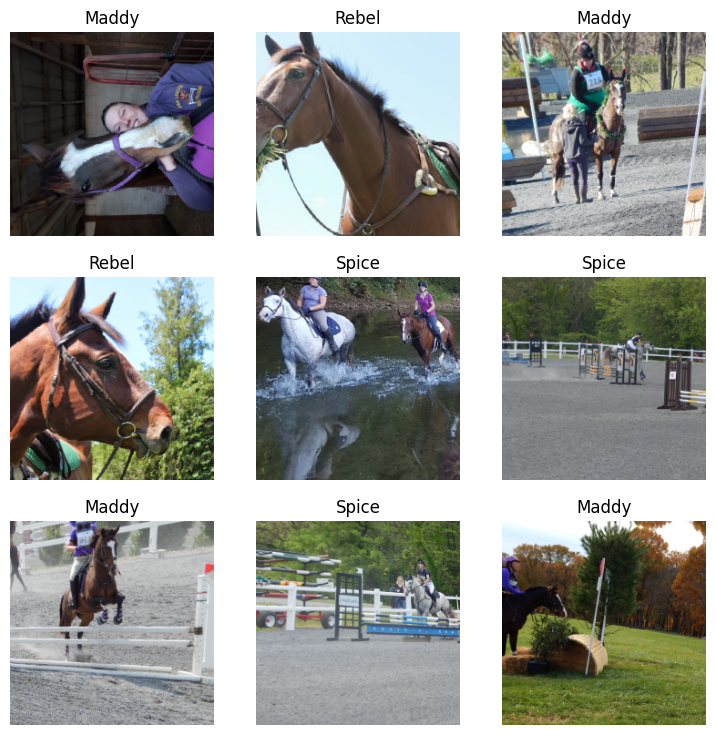

In [5]:
dls.show_batch()

In [6]:
learn = vision_learner(dls, "convnext_small", metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.585928,0.845429,0.253968,02:39


epoch,train_loss,valid_loss,error_rate,time
0,0.785987,0.467409,0.142857,02:39
1,0.637190,0.303016,0.103175,02:38
2,0.528869,0.240832,0.087302,02:40
3,0.421021,0.113099,0.055556,02:37
4,0.351762,0.096161,0.047619,02:41
5,0.295435,0.082149,0.039683,02:37
6,0.244384,0.065119,0.039683,02:39
7,0.205000,0.055413,0.007937,02:40
8,0.180527,0.050735,0.007937,02:39
9,0.155787,0.050029,0.007937,02:39


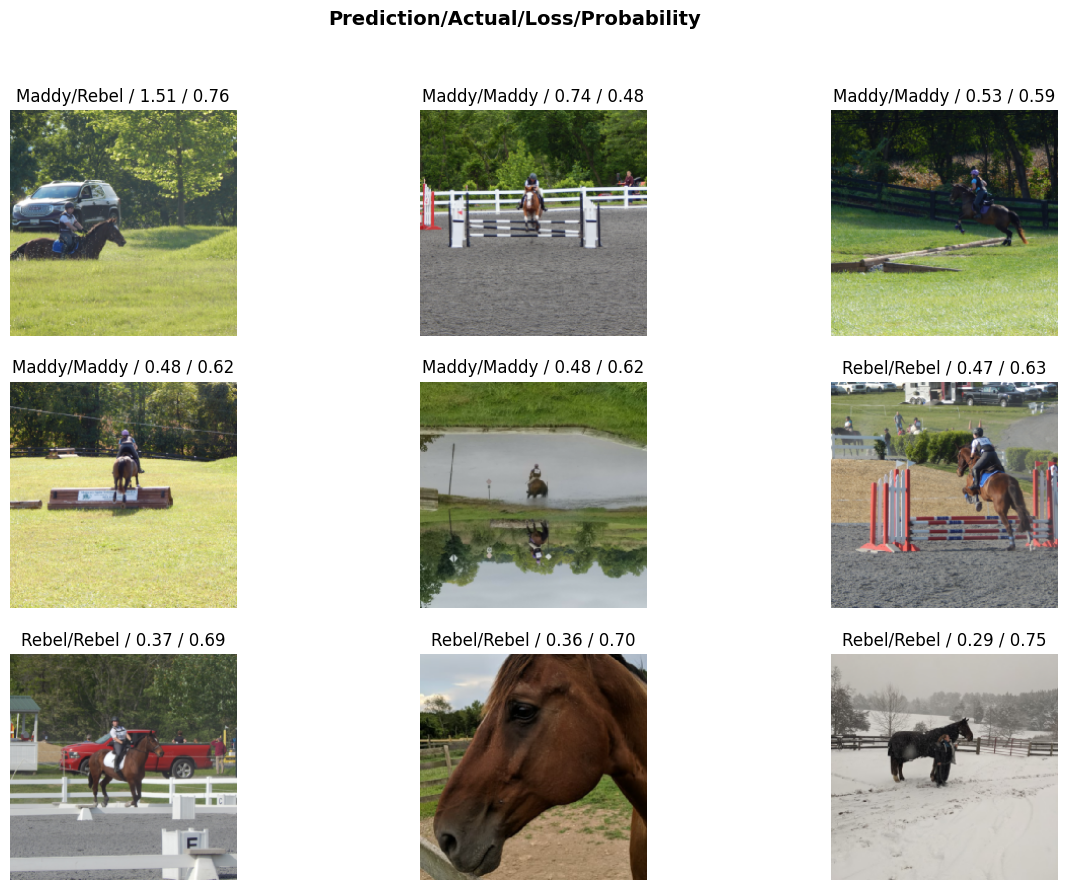

In [7]:
interp = Interpretation.from_learner(learn)

interp.plot_top_losses(9, figsize=(15,10))